In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/"
filename = "comprar_alquilar.csv"
data = pd.read_csv(mainpath + "/" + filename,sep=",")
data.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


* **ingresos:** los ingresos de la familia mensual
* **gastos comunes:** pagos de luz, agua, gas, etc mensual 
* **pago coche:** si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
* **gastos_otros:** compra en supermercado y lo necesario para vivir al mes 
* **ahorros:** suma de ahorros dispuestos a usar para la compra de la casa. 
* **vivienda:** precio de la vivienda que quiere comprar esa familia 
* **estado civil:** 0-soltero 1-casados 2-divorciados 
* **hijos:** cantidad de hijos menores y que no trabajan. 
* **trabajo:** 0-sin empleo 1-autónomo (freelance) 2-empleado 3-empresario 4-pareja: autónomos 5-pareja: empleados 6-pareja: autónomo y asalariado 7-pareja:empresario y autónomo 8-pareja: empresarios los dos o empresario y empleado 
* **comprar:** 0-No comprar 1-Comprar (esta será nuestra columna de salida, para aprender)

In [3]:
data['gastos']=(data['gastos_comunes']+data['gastos_otros']+data['pago_coche'])
data['financiar']=data['vivienda']-data['ahorros']
data.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


In [4]:
from sklearn.feature_selection import SelectKBest
#NUEVA TÉCNICA DE FEATURE SELECTION
X=data.drop(['comprar'], axis=1)
y=data['comprar']
 
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


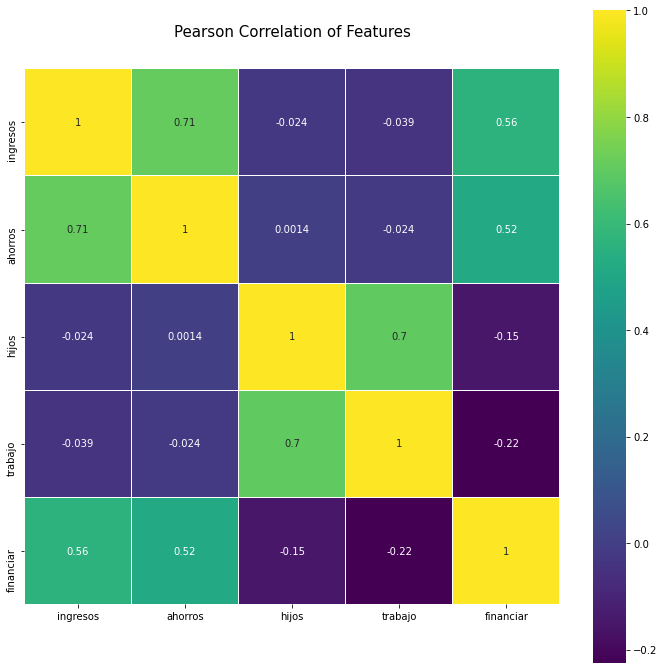

In [5]:
import seaborn as sb
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [6]:
m_corr=data[used_features].astype(float).corr()
m_corr[0:1][m_corr.iloc[0:1,1:]>0.7]

,ingresos,ahorros,hijos,trabajo,financiar
ingresos,NaN,0.712889,NaN,NaN,NaN


In [7]:
m_corr

,ingresos,ahorros,hijos,trabajo,financiar
ingresos,1.000000,0.712889,-0.024483,-0.038852,0.564351
ahorros,0.712889,1.000000,0.001445,-0.023829,0.515402
hijos,-0.024483,0.001445,1.000000,0.699916,-0.153068
trabajo,-0.038852,-0.023829,0.699916,1.000000,-0.224855
financiar,0.564351,0.515402,-0.153068,-0.224855,1.000000


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=6) 
y_train =X_train["comprar"]
y_test = X_test["comprar"]

# Gaussian Naive Bayes (GaussianNB)
Necesitamos que cumpla suposiciones de distribución normal e independencia entre sí

In [9]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.90


# Naive Bayes classifier for multivariate Bernoulli models.
Este clasificador es adecuado para datos discretos. BernoulliNB está diseñado para características binarias/booleanas.
Solo considera las categorias 1 o 0, no toma en cuenta las veces en la que aparece.

In [10]:
from sklearn.naive_bayes import BernoulliNB
# Instantiate the classifier
gnb = BernoulliNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.69
Precisión en el set de Test: 0.59


# Naive Bayes classifier for categorical features
El clasificador categórico Naive Bayes es adecuado para la clasificación con características discretas que se distribuyen categóricamente.

In [11]:
from sklearn.naive_bayes import CategoricalNB
# Instantiate the classifier
gnb = CategoricalNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.96
Precisión en el set de Test: 0.66


# Naive Bayes classifier for multinomial models
El clasificador multinomial Naive Bayes es adecuado para la clasificación con características discretas (por ejemplo, recuentos de palabras para la clasificación de texto). La distribución multinomial normalmente requiere recuentos de entidades de enteros.

No solo mide la categoría 1 o 0 sino cuantas veces aparecen las categorías

In [12]:
from sklearn.naive_bayes import MultinomialNB
# Instantiate the classifier
gnb = MultinomialNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.81
Precisión en el set de Test: 0.76


In [13]:
confusion_matrix = pd.crosstab(gnb.predict(X_train[used_features].values), y_train)
confusion_matrix

comprar,0,1
row_0,,
0,89,8
1,22,42


In [14]:
confusion_matrix = pd.crosstab(gnb.predict(X_test[used_features].values), y_test)
confusion_matrix

comprar,0,1
row_0,,
0,19,5
1,5,12


In [15]:
# Gini
from sklearn.metrics import roc_auc_score
print(2*roc_auc_score(y_train,gnb.predict_proba(X_train[used_features].values)[:,1])-1) 
print(2*roc_auc_score(y_test,gnb.predict_proba(X_test[used_features].values)[:,1])-1)

0.6641441441441442
0.5245098039215685
